# 第４回 機械学習 前処理、最適化 

## 4-1. ライブラリー、ファイル読み込み

In [1]:
# OS（オペレーティングシステム）に依存した機能を使うための標準ライブラリ
import os
#os.getcwd() # 現在のディレクトリを返す

In [2]:
# Library の読み込み
import sys # Pythonのインタプリタや実行環境に関する情報を扱うためのライブラリ
import pandas as pd # データを扱うための標準的なライブラリ
import numpy as np # 多次元配列を扱う数値演算ライブラリ
import scipy as sp # 高度な科学計算を行うためのライブラリ
import sklearn # 機械学習のライブラリ

In [3]:
# CSVファイルの読み込み
df = pd.read_csv("data/pulsar_stars_missing_values.csv") # df = data frame の略
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,126.140625,44.752398,0.288784,0.224826,4.030936,20.681124,5.952513,40.718632,0
1,112.000000,44.350169,0.286629,0.509146,0.960702,12.094775,15.353675,263.442386,0
2,80.140625,34.426265,1.697879,6.213364,7.822742,38.341936,5.048004,24.802277,1
3,52.109375,38.677803,3.179048,13.629142,4.081104,25.045129,7.126208,54.323798,1
4,96.039062,39.929117,0.383327,1.421057,2.505853,17.662456,8.849294,90.581797,0


## 4-2. 欠損値の取り扱い

### 4-2-1. 欠損値の確認

In [4]:
# 欠損値のカウント(1)
df.isnull().apply(lambda col: col.value_counts(), axis=0).fillna(0).astype(np.int)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
False,17798,17798,17798,17798,17799,17798,17798,17798,17898
True,100,100,100,100,99,100,100,100,0


In [5]:
# 欠損値のカウント(2)
df.isnull().sum()

 Mean of the integrated profile                  100
 Standard deviation of the integrated profile    100
 Excess kurtosis of the integrated profile       100
 Skewness of the integrated profile              100
 Mean of the DM-SNR curve                         99
 Standard deviation of the DM-SNR curve          100
 Excess kurtosis of the DM-SNR curve             100
 Skewness of the DM-SNR curve                    100
target_class                                       0
dtype: int64

In [6]:
# 欠損値の確認 --> Range Index - 各変数の数
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17798 non-null  float64
 1    Standard deviation of the integrated profile  17798 non-null  float64
 2    Excess kurtosis of the integrated profile     17798 non-null  float64
 3    Skewness of the integrated profile            17798 non-null  float64
 4    Mean of the DM-SNR curve                      17799 non-null  float64
 5    Standard deviation of the DM-SNR curve        17798 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17798 non-null  float64
 7    Skewness of the DM-SNR curve                  17798 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [7]:
# 欠損率
df.isnull().apply(lambda col: col.value_counts(), axis=0).fillna(0).astype(np.float).apply(lambda col: col/col.sum(), axis=0)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
False,0.994413,0.994413,0.994413,0.994413,0.994469,0.994413,0.994413,0.994413,1.0
True,0.005587,0.005587,0.005587,0.005587,0.005531,0.005587,0.005587,0.005587,0.0


### 4-2-2. 欠損値の取り扱い方法

In [8]:
df.shape

(17898, 9)

In [12]:
# 欠損値を含む行を削除
df2 = df.dropna()
df2.shape

(17099, 9)

In [13]:
df2.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [14]:
# 欠損値をその列の平均値で穴埋め
df3 = df.fillna(df.mean())
df3.shape

(17898, 9)

In [15]:
df3.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [10]:
# 選択列の欠損値をその列の中央値で穴埋め
df4 = df.fillna(df.median())
df4.shape

(17898, 9)

In [16]:
df4.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [16]:
# 選択列の欠損値をその列の最頻値で穴埋め --> 説明変数が離散値の時には有効
#df5 = df.fillna(df.mode())
#df5.shape

### 4-2-3. 欠損値補充方法の検証

In [17]:
# 各欠損値の処理済みデータセットの機械学習評価、アルゴリズム-->ランダムフォレスト
# データの分割（学習データと検証データ）

# 検証するためのプロセスを関数化

def Classify_evaluation(X, y):
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=1) # X_test, y_test と設定することも多い
    clf = RandomForestClassifier(min_samples_leaf=3, random_state=0) # clf: classifier（分類器） の略
    # モデルの学習
    clf = clf.fit(X_train, y_train)
    # 検証データで予測
    y_pred = pd.DataFrame(clf.predict(X_val))
    # 検証用データの予測精度(Open)
    score = clf.score(X_val, y_val)    
    return score

In [18]:
# 欠損値を含む行を削除
# 説明変数
X = pd.DataFrame(df2.drop("target_class", axis=1))  # Pythonのコーディングでは、説明変数を大文字のXに設定することが多い
# 目的変数
y = pd.DataFrame(df2.target_class) # pd.DataFrame(df["target_class"]) でも良い

score_delete = Classify_evaluation(X, y)
print(score_delete)

C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


0.9824561403508771


In [19]:
# 欠損値を平均値で穴埋め
# 説明変数
X = pd.DataFrame(df3.drop("target_class", axis=1))  # Pythonのコーディングでは、説明変数を大文字のXに設定することが多い
# 目的変数
y = pd.DataFrame(df3.target_class) # pd.DataFrame(df["target_class"]) でも良い

score_average = Classify_evaluation(X, y)
print(score_average)

C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


0.9846368715083799


In [20]:
# 欠損値を中央値で穴埋め
from sklearn.model_selection import train_test_split
# 説明変数
X = pd.DataFrame(df4.drop("target_class", axis=1))  # Pythonのコーディングでは、説明変数を大文字のXに設定することが多い
# 目的変数
y = pd.DataFrame(df4.target_class) # pd.DataFrame(df["target_class"]) でも良い

score_middle = Classify_evaluation(X, y)
print(score_middle)

C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


0.9837988826815642


In [21]:
print("行削除: ",score_delete)
print("平均値: ",score_average)
print("中央値: ",score_middle)

行削除:  0.9824561403508771
平均値:  0.9846368715083799
中央値:  0.9837988826815642


## 4-3. 説明変数の最適化

### 4-3-1. 相関係数による説明変数の削減

In [22]:
# フルデータCSVファイルの読み込み（欠損値なし）
df = pd.read_csv("data/pulsar_stars.csv") # df = data frame の略
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [23]:
# まずそのままで機械学習
# 説明変数
X = pd.DataFrame(df.drop(["target_class"],axis=1))
# 目的変数
y = pd.DataFrame(df.target_class) # pd.DataFrame(df["target_class"]) でも良い
original_score = Classify_evaluation(X, y)

C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


In [24]:
df_nan_corr = df.corr()
print(df_nan_corr)

                                                Mean of the integrated profile  \
 Mean of the integrated profile                                       1.000000   
 Standard deviation of the integrated profile                         0.547137   
 Excess kurtosis of the integrated profile                           -0.873898   
 Skewness of the integrated profile                                  -0.738775   
 Mean of the DM-SNR curve                                            -0.298841   
 Standard deviation of the DM-SNR curve                              -0.307016   
 Excess kurtosis of the DM-SNR curve                                  0.234331   
 Skewness of the DM-SNR curve                                         0.144033   
target_class                                                         -0.673181   

                                                Standard deviation of the integrated profile  \
 Mean of the integrated profile                                                    

In [25]:
# 相関係数が高い(0.9以上) 説明変数を DF から削除したX,yを作る
# 説明変数
X = pd.DataFrame(df.drop(["target_class"," Excess kurtosis of the DM-SNR curve"," Skewness of the integrated profile"],axis=1))
# 目的変数
y = pd.DataFrame(df.target_class) # pd.DataFrame(df["target_class"]) でも良い

In [26]:
X.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Skewness of the DM-SNR curve
0,140.562500,55.683782,-0.234571,3.199833,19.110426,74.242225
1,102.507812,58.882430,0.465318,1.677258,14.860146,127.393580
2,103.015625,39.341649,0.323328,3.121237,21.744669,63.171909
3,136.750000,57.178449,-0.068415,3.642977,20.959280,53.593661
4,88.726562,40.672225,0.600866,1.178930,11.468720,252.567306


In [27]:
correlation_score = Classify_evaluation(X, y)

# 検証用データの予測精度(Opern)
print("With origina 8 variables:        ", original_score)
print("With 6 variables by correlation: ", correlation_score) 

C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


With origina 8 variables:         0.9801675977653631
With 6 variables by correlation:  0.9784916201117319


### 4-3-2. 重要度による説明変数の最適化

In [28]:
# 説明変数
X = pd.DataFrame(df.drop("target_class", axis=1))  # Pythonのコーディングでは、説明変数を大文字のXに設定することが多い
# 目的変数
y = pd.DataFrame(df.target_class) # pd.DataFrame(df["target_class"]) でも良い

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Random Forest モデルの作成
clf = RandomForestClassifier(min_samples_leaf=3, random_state=0) # clf: classifier（分類器） の略
# モデルの学習
clf = clf.fit(X, y)

C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


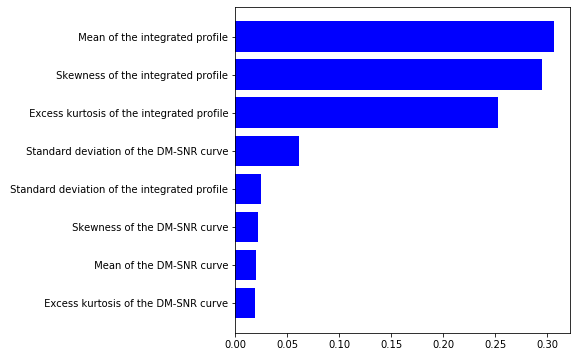

In [30]:
# 説明変数の重要度のグラフ化
import matplotlib.pyplot as plt
%matplotlib inline

features = X.columns
importances = clf.feature_importances_ # 説明変数の重要度を抽出
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()

In [31]:
# 重要度上位４つの説明変数で再学習
# 説明変数
X = pd.DataFrame(df.drop(["target_class",
                          " Standard deviation of the integrated profile",
                          " Skewness of the integrated profile",
                          " Mean of the DM-SNR curve",
                          " Excess kurtosis of the DM-SNR curve"],axis=1))
# 目的変数
y = pd.DataFrame(df.target_class) # pd.DataFrame(df["target_class"]) でも良い

In [32]:
X.head()

,Mean of the integrated profile,Excess kurtosis of the integrated profile,Standard deviation of the DM-SNR curve,Skewness of the DM-SNR curve
0,140.562500,-0.234571,19.110426,74.242225
1,102.507812,0.465318,14.860146,127.393580
2,103.015625,0.323328,21.744669,63.171909
3,136.750000,-0.068415,20.959280,53.593661
4,88.726562,0.600866,11.468720,252.567306


In [33]:
# 評価
importance_score = Classify_evaluation(X, y)
print("With origina 8 variables:        ", original_score)
print("With 6 variables by correlation: ", correlation_score) 
print("With 4 variables by importances: ", importance_score) 

C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


With origina 8 variables:         0.9801675977653631
With 6 variables by correlation:  0.9784916201117319
With 4 variables by importances:  0.9787709497206704


## 4-4. ハイパーパラメータの最適化

### 4-4-1. 自分でプログラミング

In [34]:
# ランダムフォレストのハイパーパラメーター設定値
print(clf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [35]:
# 説明変数
X = pd.DataFrame(df.drop(["target_class"],axis=1))
# 目的変数
y = pd.DataFrame(df.target_class) # pd.DataFrame(df["target_class"]) でも良い
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=1) # X_test, y_test と設定することも多い

In [36]:
# ランダムフォレストのハイパーパラメーター設定値変更
from sklearn.metrics import f1_score
i = 1
Accuracy_list = list(range(0)) # リストを作成（初期状態：要素なし）
F1_list = list(range(0)) # リストを作成（初期状態：要素なし）

while i < 11:
    from sklearn.ensemble import RandomForestClassifier
    clf = RandomForestClassifier(min_samples_leaf=i, random_state=0) # clf: classifier（分類器） の略
    # モデルの学習
    clf = clf.fit(X_train, y_train)
    # 検証データで予測
    y_pred = pd.DataFrame(clf.predict(X_val))
    acc = clf.score(X_val, y_val)
    f1 = f1_score(y_val, y_pred) 
    
    # リストの一番最後に予測精度を付け足す
    Accuracy_list.append(acc)
    F1_list.append(f1)
    
    # 検証用データの予測精度(Open)
    print("Open Accuracy (i =", i , "):", acc) 
    print("F1-score (i =", i , "):", f1) 
    
    i +=1

C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Open Accuracy (i = 1 ): 0.9787709497206704
F1-score (i = 1 ): 0.8778135048231511


C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Open Accuracy (i = 2 ): 0.979050279329609
F1-score (i = 2 ): 0.88


C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Open Accuracy (i = 3 ): 0.9801675977653631
F1-score (i = 3 ): 0.8867623604465711


C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Open Accuracy (i = 4 ): 0.9768156424581006
F1-score (i = 4 ): 0.8659127625201939


C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Open Accuracy (i = 5 ): 0.9793296089385475
F1-score (i = 5 ): 0.8798701298701298


C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Open Accuracy (i = 6 ): 0.9779329608938547
F1-score (i = 6 ): 0.8723747980613894


C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Open Accuracy (i = 7 ): 0.9782122905027933
F1-score (i = 7 ): 0.8737864077669902


C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Open Accuracy (i = 8 ): 0.9782122905027933
F1-score (i = 8 ): 0.8750000000000001


C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Open Accuracy (i = 9 ): 0.9779329608938547
F1-score (i = 9 ): 0.8719611021069692


C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Open Accuracy (i = 10 ): 0.9793296089385475
F1-score (i = 10 ): 0.8817891373801916


findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


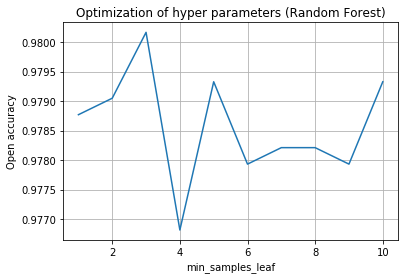

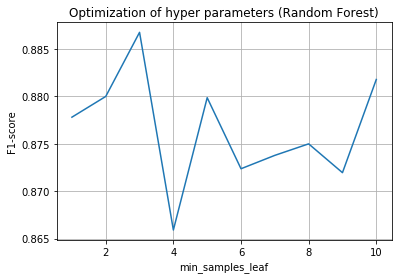

In [37]:
# ハイパーパラメータ変更の結果の折れ線グラフ作成
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Accuracy のグラフ
left = np.array([1,2, 3, 4, 5, 6, 7, 8, 9, 10])
height = np.array(Accuracy_list)
plt.plot(left, height)
plt.title('Optimization of hyper parameters (Random Forest)')
plt.xlabel('min_samples_leaf')
plt.ylabel('Open accuracy')
plt.grid()
plt.show()

# F1値 のグラフ
left = np.array([1,2, 3, 4, 5, 6, 7, 8, 9, 10])
height = np.array(F1_list)
plt.plot(left, height)
plt.title('Optimization of hyper parameters (Random Forest)')
plt.xlabel('min_samples_leaf')
plt.ylabel('F1-score')
plt.grid()
plt.show()

In [38]:
clf = RandomForestClassifier(min_samples_leaf=3, random_state=0) # clf: classifier（分類器） の略
# モデルの学習
clf = clf.fit(X_train, y_train)
# 検証データで予測
y_pred = pd.DataFrame(clf.predict(X_val))

C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = clf.predict(X_val)

# 混合行列
cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix")
print("------------------")
print(cm)
print("------------------")

# Generate a classification report
report = classification_report(y_val, pred, target_names=['False','True'])

print(report)

Confusion Matrix
------------------
[[3231   21]
 [  50  278]]
------------------
              precision    recall  f1-score   support

       False       0.99      0.98      0.99      3281
        True       0.85      0.93      0.89       299

    accuracy                           0.98      3580
   macro avg       0.92      0.96      0.94      3580
weighted avg       0.98      0.98      0.98      3580



### 4-4-2. グリッドサーチ

In [40]:
# ランダムフォレストのハイパーパラメーター設定値
print(clf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [41]:
from sklearn.model_selection import GridSearchCV # グリッドサーチのライブラリ読み込み

# グリッドサーチするパラメーターと範囲設定
search_params = {
    'n_estimators'      : [60, 70, 80],
    'min_samples_leaf'  : [1, 2, 3],
    'min_samples_split' : [8, 9, 10],
    'max_depth'         : [50, 60, 70]
}

In [42]:
# GridSearchCVクラスに渡して探索
gs = GridSearchCV(RandomForestClassifier(), # 対象の機械学習モデル
                  search_params,            # 探索パラメタ辞書
                  cv=5,                     # クロスバリデーションの分割数
                  scoring="accuracy",             # metrics
                  verbose=True,            # ログ表示
                  n_jobs=-1)               # 並列処理

gs.fit(X_train, y_train)
 
print(gs.best_estimator_)
print(gs.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  2.0min finished
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\model_selection\_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=70, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
{'max_depth': 70, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 60}


In [43]:
from sklearn.metrics import classification_report

y_pred = gs.predict(X_val)

# 混合行列
cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix")
print("------------------")
print(cm)
print("------------------")

# Generate a classification report
report = classification_report(y_val, y_pred, target_names=['False','True'])

print(report)

Confusion Matrix
------------------
[[3228   24]
 [  55  273]]
------------------
              precision    recall  f1-score   support

       False       0.99      0.98      0.99      3283
        True       0.83      0.92      0.87       297

    accuracy                           0.98      3580
   macro avg       0.91      0.95      0.93      3580
weighted avg       0.98      0.98      0.98      3580



### 4-4-3. ランダムサーチ

In [44]:
# グリッドサーチの最適値
# {'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 60}

from sklearn.model_selection import RandomizedSearchCV # ランダムサーチのライブラリ読み込み
from scipy.stats import randint as sp_randint

search_params = {"max_depth": sp_randint(10, 100),
                 "n_estimators": sp_randint(10, 100),
                 "min_samples_split": sp_randint(2, 10),
                 "min_samples_leaf": sp_randint(1, 10)}

In [45]:
# RandomizedSearchCVクラスに渡して探索
rs = RandomizedSearchCV(RandomForestClassifier(),
                        search_params,     # 探索パラメタ辞書
                        cv=5,              # クロスバリデーションの分割数
                        scoring="accuracy",      # metrics
                        verbose=True,     # ログ表示
                        n_jobs=-1)         # 並列処理
                                    
rs.fit(X_train, y_train)
print(rs.best_estimator_)
print(rs.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.3s finished
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\model_selection\_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=11, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
{'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 30}


In [46]:
from sklearn.metrics import classification_report

y_pred = rs.predict(X_val)

# 混合行列
cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix")
print("------------------")
print(cm)
print("------------------")

# Generate a classification report
report = classification_report(y_val, y_pred, target_names=['False','True'])

print(report)

Confusion Matrix
------------------
[[3234   18]
 [  58  270]]
------------------
              precision    recall  f1-score   support

       False       0.99      0.98      0.99      3292
        True       0.82      0.94      0.88       288

    accuracy                           0.98      3580
   macro avg       0.91      0.96      0.93      3580
weighted avg       0.98      0.98      0.98      3580

